In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(
    context="talk",
    style="whitegrid",
    rc={
        "figure.figsize": (16, 8),
        "figure.dpi": 100,
    },
)

# Data Loading

In [4]:
data_set = xr.open_dataset("ensemble_10km_test.nc")
data_set

<xarray.Dataset>
Dimensions:  (1: 1, num_in_ensemble: 42, num_of_inputs: 2)
Dimensions without coordinates: 1, num_in_ensemble, num_of_inputs
Data variables:
    SLC      (1, num_in_ensemble) float64 ...
    Inputs   (num_of_inputs, num_in_ensemble) float64 ...
Attributes:
    title:             A trial ensemble of WAVI runs for use in building an e...
    run definition:    Each run is 100 years of the WAVI model
    Model resolution:  10 km
    Initial Data:      bed: Bedmap2+, DEM: Cryosat2, dhdt: ICESat-2, velocs: ...

In [5]:
data_set["Inputs"]

<xarray.DataArray 'Inputs' (num_of_inputs: 2, num_in_ensemble: 42)>
array([[  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200.,   0.,
         10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
        120., 130., 140., 150., 160., 170., 180., 190., 200.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])
Dimensions without coordinates: num_of_inputs, num_in_ensemble
Attributes:
    units:                      column 1: m/a, column 2: logical
    long_name:                  Model inputs array, with each column being a ...
    input variables (columns):  column 1: Melt rates in m/a. column 2: melt i...

In [6]:
data_set["SLC"]

<xarray.DataArray 'SLC' (1: 1, num_in_ensemble: 42)>
array([[ 64.654929, 104.798567, 163.271556, 203.289232, 245.389513,
        298.583544, 357.871639, 409.937296, 461.458715, 506.379768,
        545.764469, 580.670561, 612.368945, 641.423411, 667.998772,
        692.433422, 719.249273, 746.182968, 771.220347, 796.363312,
        822.950065,  64.654929,  68.967997,  79.938268,  88.504179,
         94.526641,  99.443415, 104.200188, 107.829638, 111.097449,
        114.533488, 117.098416, 118.823803, 120.460335, 121.356288,
        122.637451, 122.768618, 124.000751, 127.196094, 127.005198,
        131.477876, 133.641197]])
Dimensions without coordinates: 1, num_in_ensemble
Attributes:
    units:      mm
    long_name:  The SLC from 100 years of a WAVI run

In [7]:
X = pd.DataFrame(
    {
        "melt_rate": data_set["Inputs"][0],
        "melt_in_partial_cells": data_set["Inputs"][1],
    }
)

X

,melt_rate,melt_in_partial_cells
0,0.0,1.0
1,10.0,1.0
2,20.0,1.0
3,30.0,1.0
4,40.0,1.0
5,50.0,1.0
6,60.0,1.0
7,70.0,1.0
8,80.0,1.0
9,90.0,1.0


In [8]:
y = pd.DataFrame({"SLC": data_set["SLC"][0]})
y

,SLC
0,64.654929
1,104.798567
2,163.271556
3,203.289232
4,245.389513
5,298.583544
6,357.871639
7,409.937296
8,461.458715
9,506.379768


In [9]:
Xy = pd.concat([X, y], axis=1)

<AxesSubplot:xlabel='melt_rate', ylabel='SLC'>

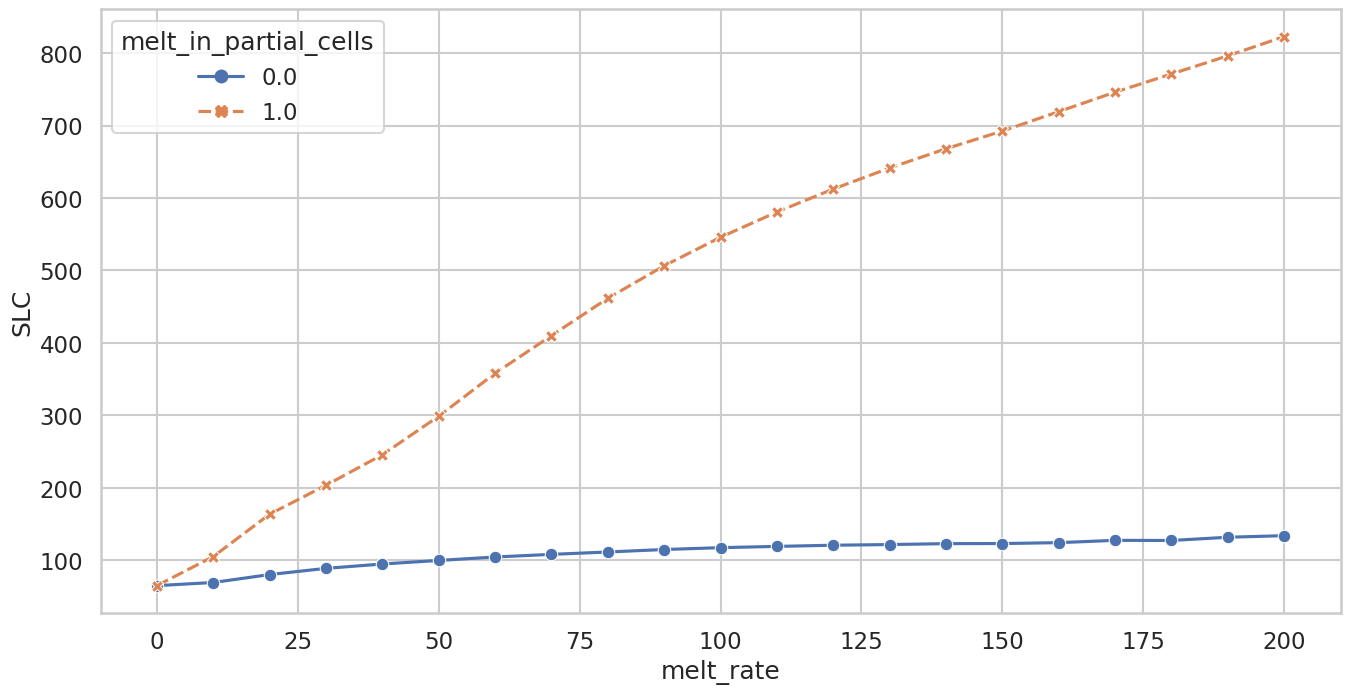

In [10]:
sns.lineplot(
    x="melt_rate",
    y="SLC",
    hue="melt_in_partial_cells",
    style="melt_in_partial_cells",
    data=Xy,
    markers=True,
)

# Modelling

In [11]:
import GPy

In [12]:
indexers = [
    X["melt_in_partial_cells"] == 0.0,
    X["melt_in_partial_cells"] == 1.0,
]
indexers = [indexer.values for indexer in indexers]

In [13]:
X_test = np.mgrid[-20.0:220.0:200j][:, None]
X_test_indexers = [
    np.zeros_like(X_test),
    np.ones_like(X_test),
]

colors = ["C0", "C1"]

In [14]:
Xs = [X.values[indexer][:, [0]] for indexer in indexers]
ys = [y.values[indexer] for indexer in indexers]

In [15]:
def coreg_model(Xs, ys, with_linear=False):
    K1 = GPy.kern.Bias(1)
    K2 = GPy.kern.Linear(1)
    K3 = GPy.kern.Matern32(1)
    lcm = GPy.util.multioutput.LCM(
        input_dim=1,
        num_outputs=2,
        kernels_list=[K1, K2, K3] if with_linear else [K1, K3],
    )

    coreg_model = GPy.models.gp_coregionalized_regression.GPCoregionalizedRegression(
        X_list=Xs, Y_list=ys, kernel=lcm
    )

    coreg_model[".*Mat.*variance.*"].constrain_bounded(30.0, 100.0)
    coreg_model[".*Mat.*lengthscale.*"].constrain_bounded(50.0, 500.0)

    coreg_model[".*noise.*variance"].constrain_fixed(1e-8)

    coreg_model.optimize_restarts(num_restarts=5)
    return coreg_model

In [16]:
def plot_model(coreg_model, Xs, ys):
    sns.lineplot(
        x="melt_rate",
        y="SLC",
        hue="melt_in_partial_cells",
        style="melt_in_partial_cells",
        data=Xy,
        markers=True,
    )

    for X, y in zip(Xs, ys):
        plt.scatter(X, y, marker="o", c="black", alpha=0.8, s=250)

    for indexer, color in zip(X_test_indexers, colors):
        y_test, y_test_var = coreg_model.predict(
            np.hstack([X_test, indexer]),
            Y_metadata={"output_index": indexer.astype(int)},
        )
        y_test_std = np.sqrt(y_test_var)
        plt.plot(X_test, y_test, c=color)
        plt.fill_between(
            X_test[..., 0],
            y_test[..., 0] - 2 * y_test_std[..., 0],
            y_test[..., 0] + 2 * y_test_std[..., 0],
            color=color,
            alpha=0.4,
        )

reconstraining parameters gp.sum.ICM1.Mat32.variance
reconstraining parameters gp.sum.ICM1.Mat32.lengthscale


Optimization restart 1/5, f = 129.27606046042186
Optimization restart 2/5, f = 129.27607127082882
Optimization restart 3/5, f = 129.27603211691903
Optimization restart 4/5, f = 129.27664351700582
Optimization restart 5/5, f = 129.27631834491217


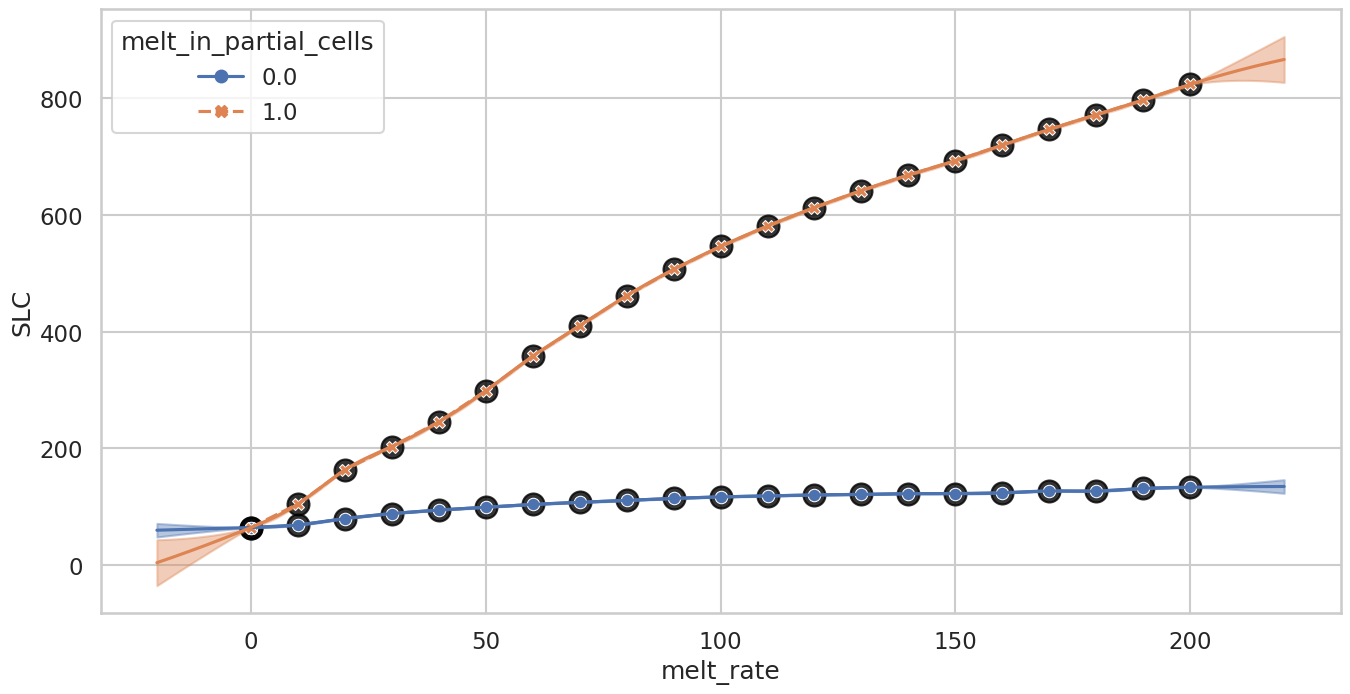

In [17]:
plot_model(coreg_model(Xs, ys), Xs, ys)

reconstraining parameters gp.sum.ICM1.Mat32.variance
reconstraining parameters gp.sum.ICM1.Mat32.lengthscale


Optimization restart 1/5, f = 34.79671703480501
Optimization restart 2/5, f = 34.79666919330081
Optimization restart 3/5, f = 34.79673292750743
Optimization restart 4/5, f = 34.79670205546636
Optimization restart 5/5, f = 34.79666902165949


gp.,value,constraints,priors
sum.ICM0.bias.variance,6.838448994874634e-06,+ve,
sum.ICM0.B.W,"(2, 1)",,
sum.ICM0.B.kappa,"(2,)",+ve,
sum.ICM1.Mat32.variance,99.96083647048512,"30.0,100.0",
sum.ICM1.Mat32.lengthscale,247.79244884970237,"50.0,500.0",
sum.ICM1.B.W,"(2, 1)",,
sum.ICM1.B.kappa,"(2,)",+ve,
mixed_noise.Gaussian_noise_0.variance,1e-08,+ve fixed,
mixed_noise.Gaussian_noise_1.variance,1e-08,+ve fixed,


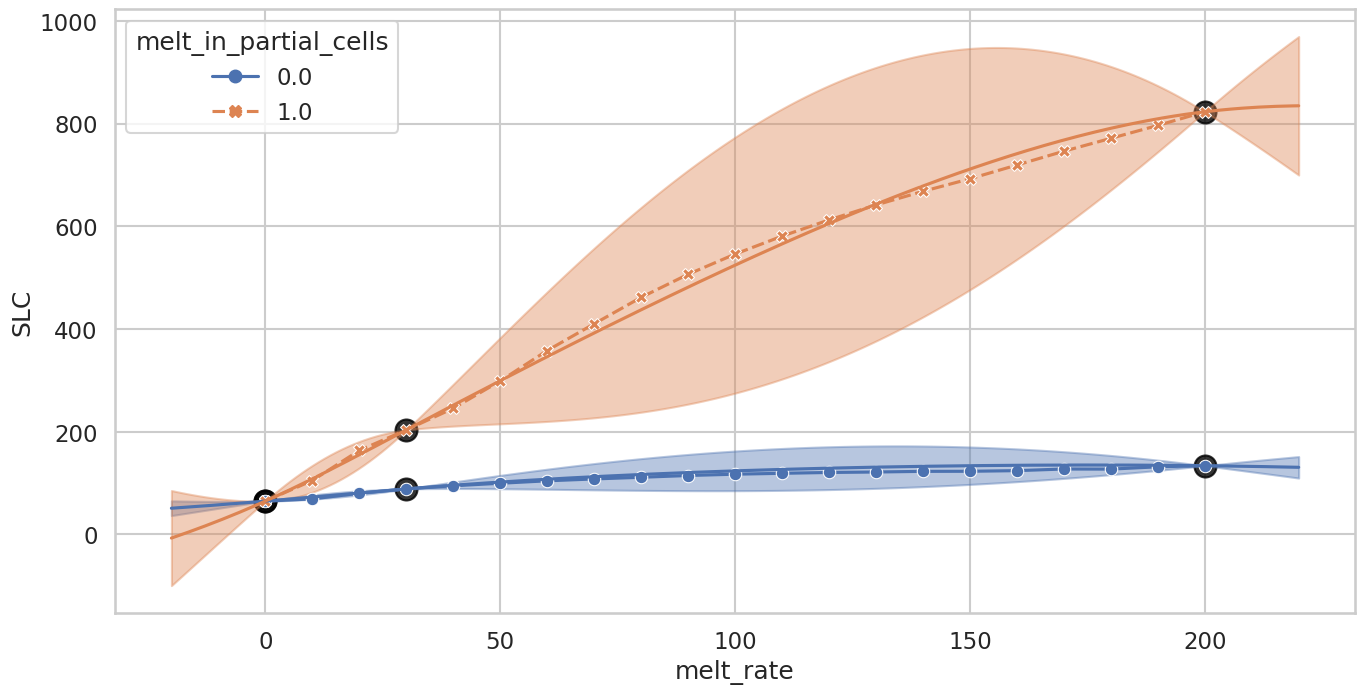

In [18]:
Xs_sub = [
    Xs[0][[0, 3, 20]],
    Xs[1][[0, 3, 20]],
]

ys_sub = [
    ys[0][[0, 3, 20]],
    ys[1][[0, 3, 20]],
]


model = coreg_model(
    Xs_sub,
    ys_sub,
)
plot_model(model, Xs_sub, ys_sub)

model

reconstraining parameters gp.sum.ICM2.Mat32.variance
reconstraining parameters gp.sum.ICM2.Mat32.lengthscale


Optimization restart 1/5, f = 23.311397486390142
Optimization restart 2/5, f = 23.85205927579312
Optimization restart 3/5, f = 22.835233242568613
Optimization restart 4/5, f = 21.477552582980373
Optimization restart 5/5, f = 21.930933316264085


gp.,value,constraints,priors
sum.ICM0.bias.variance,15.346442685698788,+ve,
sum.ICM0.B.W,"(2, 1)",,
sum.ICM0.B.kappa,"(2,)",+ve,
sum.ICM1.linear.variances,0.0029635421675185277,+ve,
sum.ICM1.B.W,"(2, 1)",,
sum.ICM1.B.kappa,"(2,)",+ve,
sum.ICM2.Mat32.variance,99.99933741007673,"30.0,100.0",
sum.ICM2.Mat32.lengthscale,239.73677465695258,"50.0,500.0",
sum.ICM2.B.W,"(2, 1)",,
sum.ICM2.B.kappa,"(2,)",+ve,


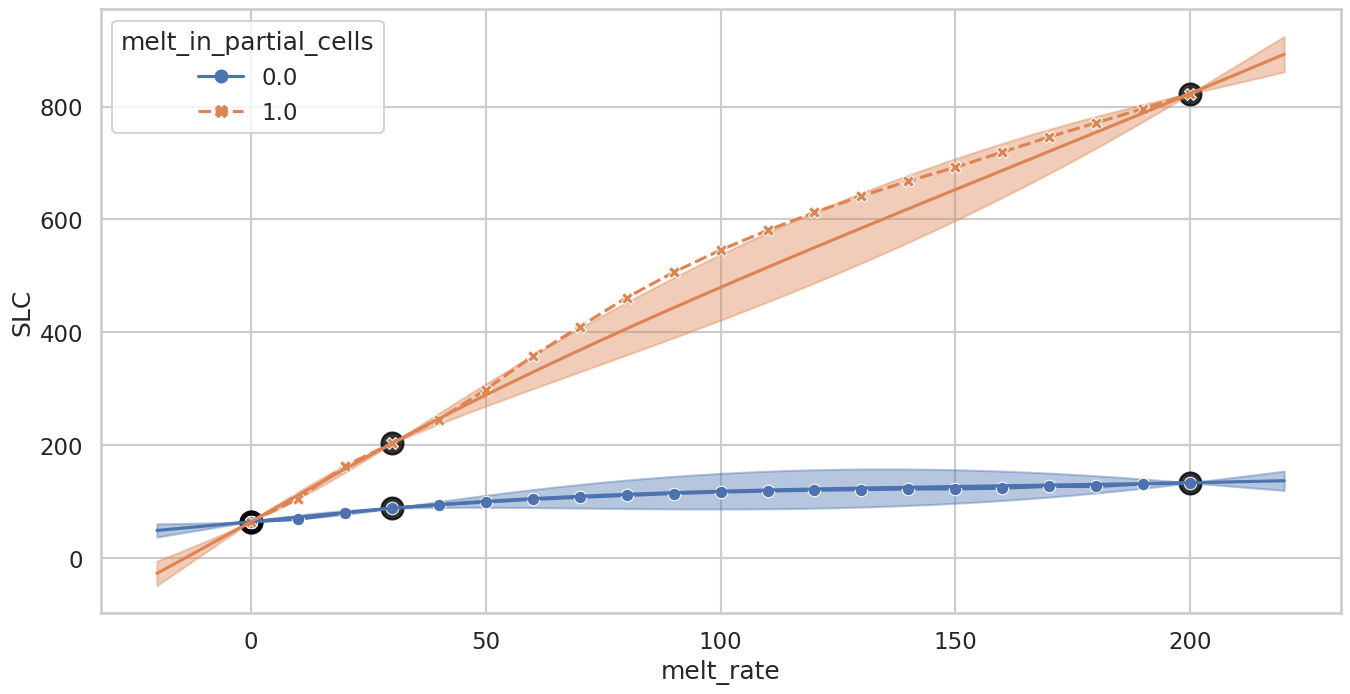

In [19]:
Xs_sub = [
    Xs[0][[0, 3, 20]],
    Xs[1][[0, 3, 20]],
]

ys_sub = [
    ys[0][[0, 3, 20]],
    ys[1][[0, 3, 20]],
]


model = coreg_model(Xs_sub, ys_sub, with_linear=True)
plot_model(model, Xs_sub, ys_sub)

model

reconstraining parameters gp.sum.ICM1.Mat32.variance
reconstraining parameters gp.sum.ICM1.Mat32.lengthscale


Optimization restart 1/5, f = 44.116923272752054
Optimization restart 2/5, f = 44.11688370849826
Optimization restart 3/5, f = 44.11688610164472
Optimization restart 4/5, f = 44.11690664274042
Optimization restart 5/5, f = 44.11689411534996


gp.,value,constraints,priors
sum.ICM0.bias.variance,1.1270844776290832e-05,+ve,
sum.ICM0.B.W,"(2, 1)",,
sum.ICM0.B.kappa,"(2,)",+ve,
sum.ICM1.Mat32.variance,99.99429671591776,"30.0,100.0",
sum.ICM1.Mat32.lengthscale,275.0744613250462,"50.0,500.0",
sum.ICM1.B.W,"(2, 1)",,
sum.ICM1.B.kappa,"(2,)",+ve,
mixed_noise.Gaussian_noise_0.variance,1e-08,+ve fixed,
mixed_noise.Gaussian_noise_1.variance,1e-08,+ve fixed,


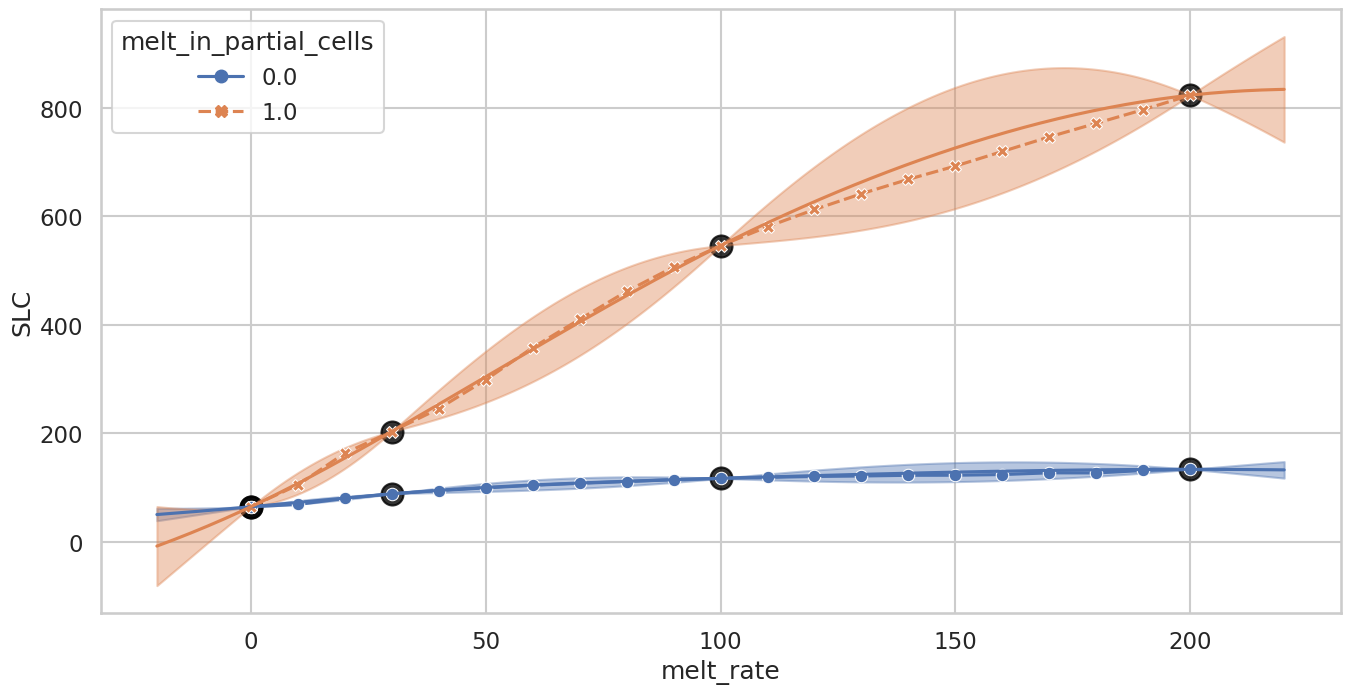

In [20]:
Xs_sub = [
    Xs[0][[0, 3, 10, 20]],
    Xs[1][[0, 3, 10, 20]],
]

ys_sub = [
    ys[0][[0, 3, 10, 20]],
    ys[1][[0, 3, 10, 20]],
]


model = coreg_model(
    Xs_sub,
    ys_sub,
)
plot_model(model, Xs_sub, ys_sub)

model

reconstraining parameters gp.sum.ICM1.Mat32.variance
reconstraining parameters gp.sum.ICM1.Mat32.lengthscale


Optimization restart 1/5, f = 71.96810557538703
Optimization restart 2/5, f = 71.96795375382709
Optimization restart 3/5, f = 70.86034701845874
Optimization restart 4/5, f = 71.9680972145996
Optimization restart 5/5, f = 70.86031662840324


gp.,value,constraints,priors
sum.ICM0.bias.variance,33.694632889536706,+ve,
sum.ICM0.B.W,"(2, 1)",,
sum.ICM0.B.kappa,"(2,)",+ve,
sum.ICM1.Mat32.variance,99.32663177724076,"30.0,100.0",
sum.ICM1.Mat32.lengthscale,114.97659357990328,"50.0,500.0",
sum.ICM1.B.W,"(2, 1)",,
sum.ICM1.B.kappa,"(2,)",+ve,
mixed_noise.Gaussian_noise_0.variance,1e-08,+ve fixed,
mixed_noise.Gaussian_noise_1.variance,1e-08,+ve fixed,


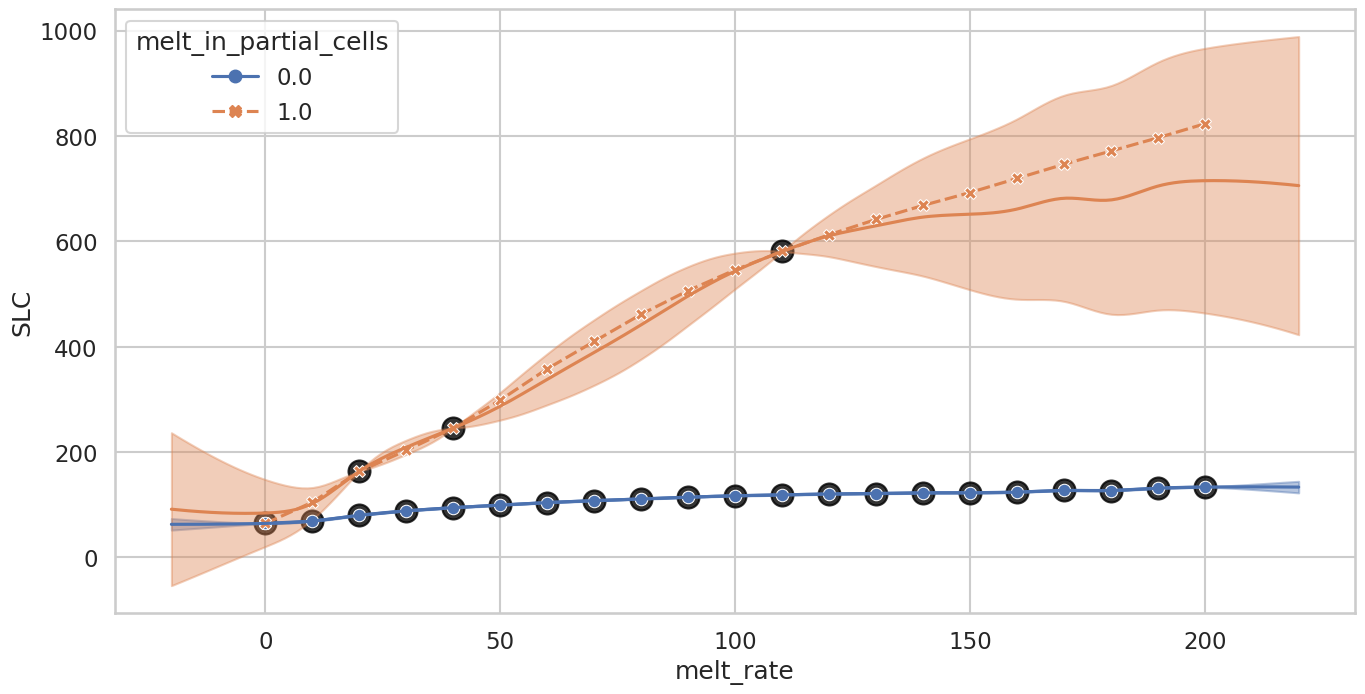

In [21]:
Xs_transfer = [
    Xs[0],
    Xs[1][[2, 4, 11]],
]

ys_transfer = [
    ys[0],
    ys[1][[2, 4, 11]],
]

model = coreg_model(
    Xs_transfer,
    ys_transfer,
)
plot_model(model, Xs_transfer, ys_transfer)
model

reconstraining parameters gp.sum.ICM2.Mat32.variance
reconstraining parameters gp.sum.ICM2.Mat32.lengthscale


Optimization restart 1/5, f = 54.288850631283005
Optimization restart 2/5, f = 59.85826483973828
Optimization restart 3/5, f = 56.446277044262004
Optimization restart 4/5, f = 56.574789520457344
Optimization restart 5/5, f = 57.088128395722656


gp.,value,constraints,priors
sum.ICM0.bias.variance,9.972002746704561,+ve,
sum.ICM0.B.W,"(2, 1)",,
sum.ICM0.B.kappa,"(2,)",+ve,
sum.ICM1.linear.variances,0.024863561617670917,+ve,
sum.ICM1.B.W,"(2, 1)",,
sum.ICM1.B.kappa,"(2,)",+ve,
sum.ICM2.Mat32.variance,30.007138040109197,"30.0,100.0",
sum.ICM2.Mat32.lengthscale,50.00040353622365,"50.0,500.0",
sum.ICM2.B.W,"(2, 1)",,
sum.ICM2.B.kappa,"(2,)",+ve,


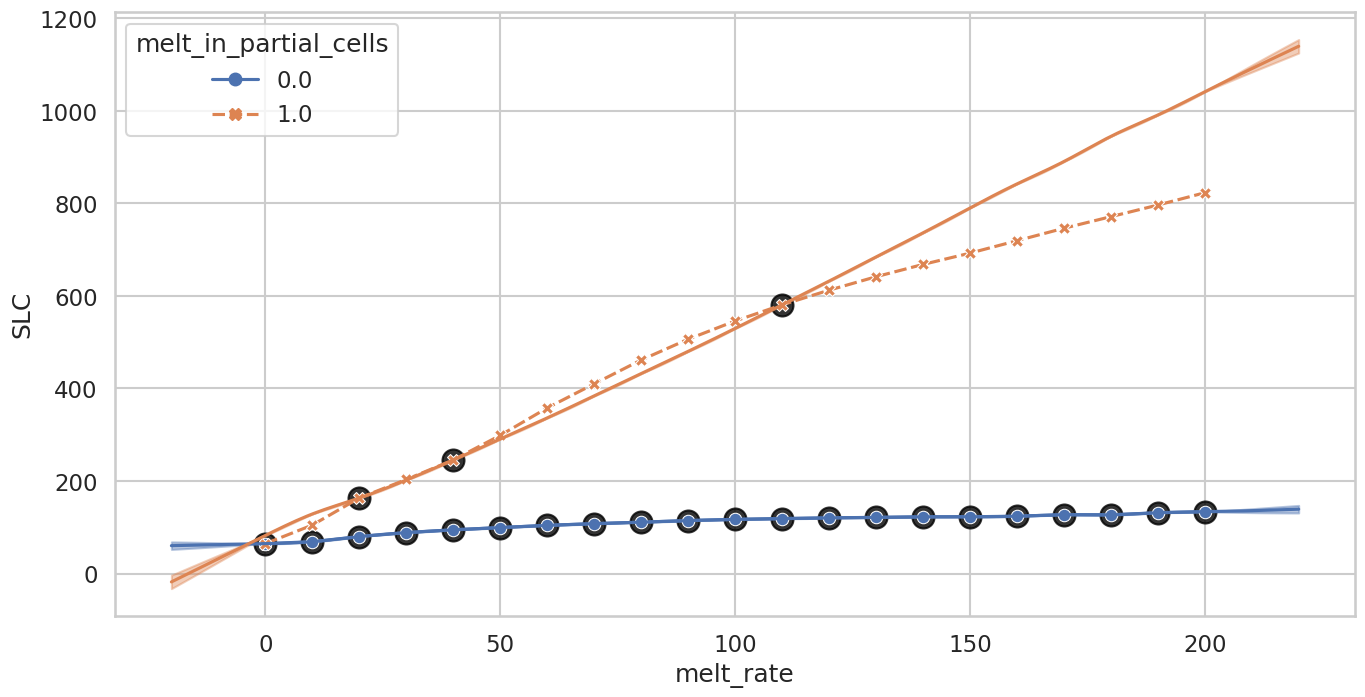

In [22]:
Xs_transfer = [
    Xs[0],
    Xs[1][[2, 4, 11]],
]

ys_transfer = [
    ys[0],
    ys[1][[2, 4, 11]],
]

model = coreg_model(
    Xs_transfer,
    ys_transfer,
    with_linear=True,
)
plot_model(model, Xs_transfer, ys_transfer)
model